In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os


In [5]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



In [6]:
# Define the data directory
data_dir = 'data'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
#image_datasets

In [7]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 54, 'val': 38}


['flounder-witch',
 'flounder-witch-bottom',
 'haddock',
 'hake-red',
 'hake-silver',
 'pollock',
 'redfish']

In [8]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/home/pratishthit/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pratishthit/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")


train Loss: 7.9581 Acc: 0.0000
val Loss: 4.9886 Acc: 0.0789
train Loss: 3.8201 Acc: 0.0741
val Loss: 3.2585 Acc: 0.2632
train Loss: 2.5558 Acc: 0.2593
val Loss: 2.5749 Acc: 0.3421
train Loss: 2.2673 Acc: 0.2778
val Loss: 2.3947 Acc: 0.2632
train Loss: 2.0405 Acc: 0.2963
val Loss: 2.0856 Acc: 0.3421
train Loss: 1.5861 Acc: 0.3889
val Loss: 2.0419 Acc: 0.3421
train Loss: 1.4313 Acc: 0.5556
val Loss: 1.8015 Acc: 0.3947
train Loss: 1.1694 Acc: 0.6481
val Loss: 1.6767 Acc: 0.3684
train Loss: 1.5095 Acc: 0.5370
val Loss: 1.6813 Acc: 0.3947
train Loss: 1.0968 Acc: 0.5741
val Loss: 1.6583 Acc: 0.3947
train Loss: 1.1153 Acc: 0.5926
val Loss: 1.6069 Acc: 0.3947
train Loss: 1.1195 Acc: 0.6296
val Loss: 1.4826 Acc: 0.3421
train Loss: 1.2163 Acc: 0.5370
val Loss: 1.6779 Acc: 0.5000
train Loss: 1.1438 Acc: 0.6296
val Loss: 1.4838 Acc: 0.4211
train Loss: 0.8500 Acc: 0.6481
val Loss: 1.3965 Acc: 0.5789
train Loss: 0.6759 Acc: 0.8148
val Loss: 1.3869 Acc: 0.4737
train Loss: 1.2042 Acc: 0.6296
val Loss:

In [10]:

# Save the model
torch.save(model.state_dict(), 'fish_classification.pth')


In [11]:
# import matplotlib.pyplot as plt

# # Move model to GPU
# model = model.to(device)

# # Lists to store training and validation accuracies
# train_acc_history = []
# val_acc_history = []

# # Training loop
# num_epochs = 10
# for epoch in range(num_epochs):
#     for phase in ['train', 'val']:
#         if phase == 'train':
#             model.train()
#         else:
#             model.eval()

#         running_loss = 0.0
#         running_corrects = 0

#         for inputs, labels in dataloaders[phase]:
#             inputs = inputs.to(device)  # Move data to GPU
#             labels = labels.to(device)  # Move data to GPU

#             optimizer.zero_grad()

#             with torch.set_grad_enabled(phase == 'train'):
#                 outputs = model(inputs)
#                 _, preds = torch.max(outputs, 1)
#                 loss = criterion(outputs, labels)

#                 if phase == 'train':
#                     loss.backward()
#                     optimizer.step()

#             running_loss += loss.item() * inputs.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#         epoch_loss = running_loss / dataset_sizes[phase]
#         epoch_acc = running_corrects.double() / dataset_sizes[phase]

#         if phase == 'train':
#             train_acc_history.append(epoch_acc.cpu().numpy())  # Move tensor to CPU and convert to NumPy
#         else:
#             val_acc_history.append(epoch_acc.cpu().numpy())  # Move tensor to CPU and convert to NumPy

#         print(f'Epoch [{epoch+1}/{num_epochs}], {phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

# print("Training complete!")

# # Plot accuracies
# plt.plot(range(1, num_epochs + 1), train_acc_history, label='Train')
# plt.plot(range(1, num_epochs + 1), val_acc_history, label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracies')
# plt.legend()
# plt.show()


# Classification on Unseen Image

To use the saved model to classify unseen images, you need to load the model and then apply it to the new images for inference. 

In [12]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('fish_classification.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 7)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:7]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:7]




Prepare your new image for classification. You should use the same data transformations you used during training. Here's an example of how to prepare an image for inference:

In [13]:
# Load and preprocess the unseen image
image_path = '/home/pratishthit/Desktop/Transformers/PytorchCNN/data/val/flounder-witch/original (1).jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension


Perform inference using the model:

In [14]:
# Perform inference
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['flounder-witch',
 'flounder-witch-bottom',
 'haddock',
 'hake-red',
 'hake-silver',
 'pollock',
 'redfish']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')


The predicted class is: flounder-witch


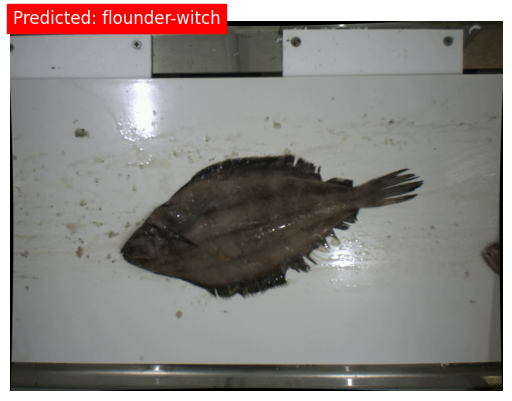

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()